In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('C:/USERS/YASHN/AVOCADO.CSV')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)


In [4]:
# Checking the dimensions
df.shape

(18249, 13)

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
# Checking Null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

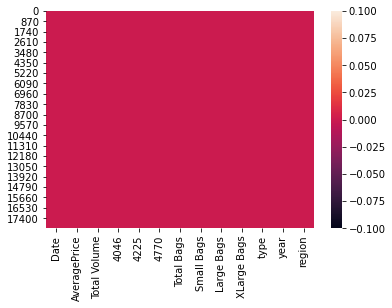

In [8]:
# Plotting heatmap
sns.heatmap(df.isnull())

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [13]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [14]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [15]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

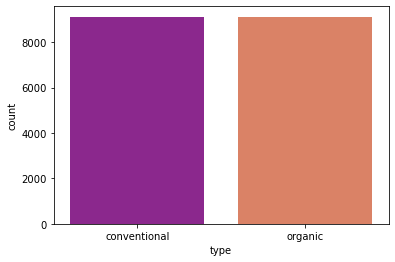

In [16]:
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

In [17]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

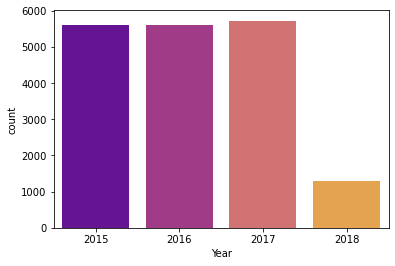

In [18]:
sns.countplot(x='Year', data=df, palette="plasma")
plt.show()

In [19]:
df['Month'].value_counts()

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

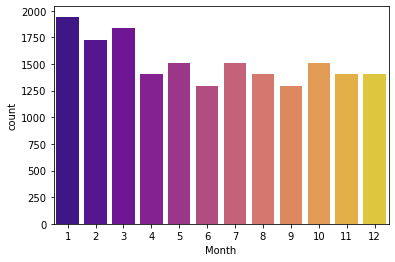

In [20]:
sns.countplot(x='Month', data=df, palette="plasma")
plt.show()

In [21]:
df['Date'].value_counts()

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64

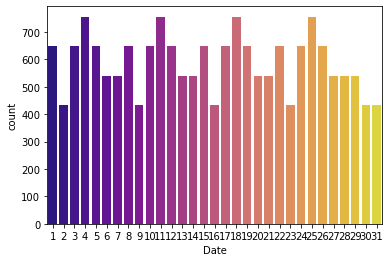

In [22]:
sns.countplot(x='Date', data=df, palette="plasma")
plt.show()

In [23]:
df['region'].value_counts()

Midsouth               338
Spokane                338
Jacksonville           338
Tampa                  338
BuffaloRochester       338
Philadelphia           338
MiamiFtLauderdale      338
Boston                 338
SouthCentral           338
California             338
Southeast              338
LasVegas               338
NewOrleansMobile       338
SouthCarolina          338
Orlando                338
Portland               338
Indianapolis           338
Houston                338
PhoenixTucson          338
Louisville             338
Nashville              338
GrandRapids            338
DallasFtWorth          338
CincinnatiDayton       338
RichmondNorfolk        338
Northeast              338
West                   338
NorthernNewEngland     338
Roanoke                338
HarrisburgScranton     338
SanFrancisco           338
GreatLakes             338
TotalUS                338
Pittsburgh             338
NewYork                338
StLouis                338
Chicago                338
C

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Date'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSu

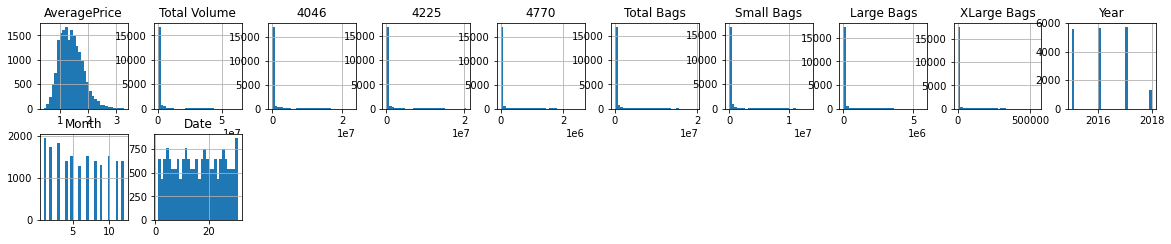

In [24]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

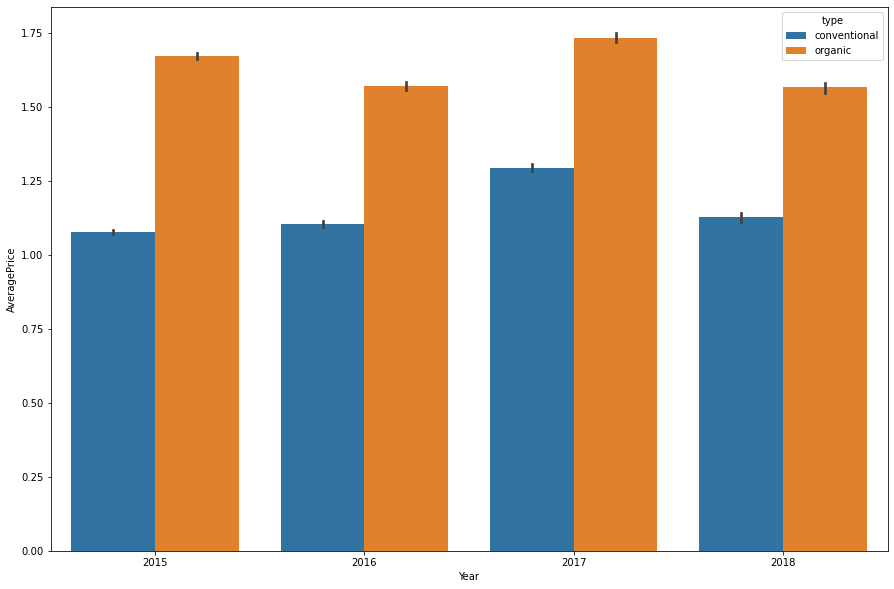

In [25]:
# Checking Average Price yearwise
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='AveragePrice', hue='type', data=df)
plt.show()

In [26]:
# Checking Correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Date
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

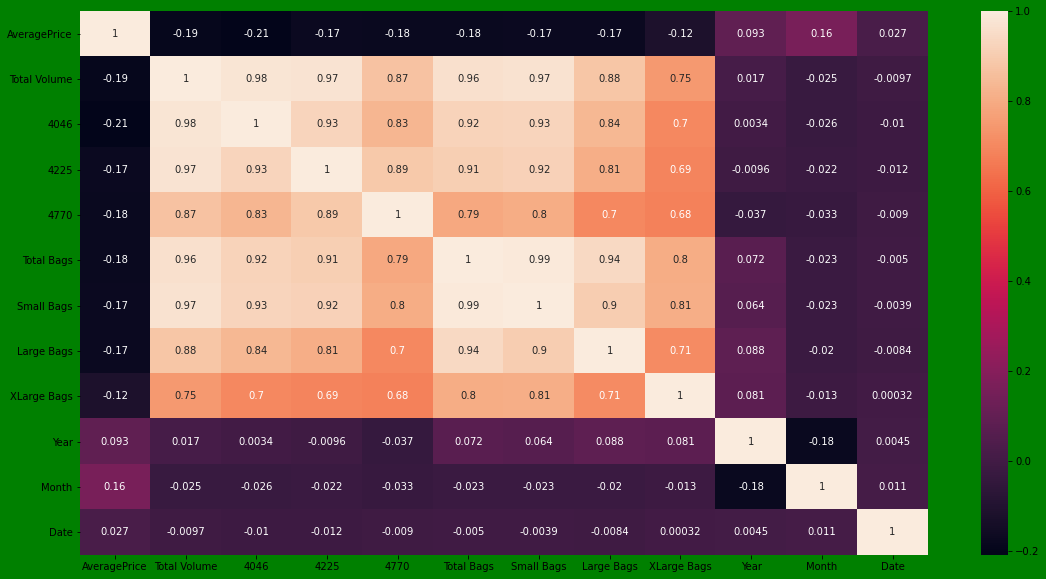

In [27]:
# plotting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

Observations from the above graphs: 1.The count of types of avacado is almost the same for both conventional and organic. 2.  Yearwise Count is almost the same quantity sold in the year 2015 till 2017, but it decreased in 2018.
3. prices of Conventional Avacado was almost similar except in 2017 where it was a bit expensive, while we can observe a little difference in organic avacado every year.  4. Inthe correlation matrix, we can observe a high correlation in Total Volume, X-large bags, large bags, small bags,total bags,4740,4225,4046.

In [28]:
# Checking Skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
Date             0.014310
dtype: float64

We can observe high skewness in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, Xlarge Bags.

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['region']=LE.fit_transform(df['region'].values.reshape(-1,1))
df['type']=LE.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,2018,1,14


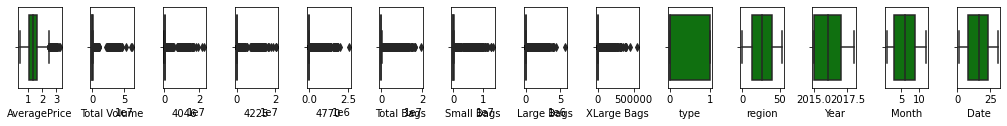

In [30]:
# Checking Outliers
collist=df.columns.values
ncol=17
nrows=30
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above boxplots, we can see outliers in almost all the columns.

In [31]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.22128204, 1.64763162,
        1.29185687],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.22128204, 1.64763162,
        0.49423066],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.22128204, 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.97050371, 1.46495942,
        0.60817726],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.97050371, 1.46495942,
        0.18944895],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.97050371, 1.46495942,
        0.98707516]])

In [32]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


In [33]:
z[6][8]


0.1755796145322505

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,2018,1,14


In [35]:
df_new.shape

(17651, 14)

In [36]:
# Checking the percentage of loss data
loss_percent =(18249-17651)/18249*100
print(loss_percent)

3.276891884486821


After removing the outliers with the help of z score method, we can see that the percentage of loss data is 3.27%

In [37]:
 # Rechecking the skewness in new df
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

In [38]:
# Removing Skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(df_new[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].values)

In [39]:
# Rechecking Skewness
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

Hence, we can see that there are no skewness in our data.

In [40]:
# Splitting the Dataset
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]

In [41]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [42]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.695495,-1.210013,1.644612,1.289309
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.695495,-1.210013,1.644612,0.491652
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.695495,-1.210013,1.644612,-0.306004
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.695495,-1.210013,1.644612,-1.103660
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.695495,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.747054,1.980756,-1.180379,-1.331562
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.747054,1.980756,-1.462878,1.403260
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.747054,1.980756,-1.462878,0.605603
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.747054,1.980756,-1.462878,-0.192053


In [43]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [44]:
# Checking multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,53.875835,Total Volume
1,7.258553,4046
2,11.390222,4225
3,3.953072,4770
4,35.136063,Total Bags
5,16.629510,Small Bags
6,3.460667,Large Bags
7,2.055389,XLarge Bags
8,3.700460,type
9,1.086996,region


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [46]:
x_train.shape

(11826, 13)

In [47]:
y_train.shape

(11826,)

In [48]:
x_test.shape

(5825, 13)

In [49]:
y_test.shape

(5825,)

In [50]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)    

0.5580070737255618


In [51]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.06347736064971857
MAE: 0.19910628717727466
r2_score: 0.2415359803130941


In [52]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [53]:
# Using LASSO
from sklearn import metrics
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.00020364435944819625
MSE: 0.14881166273694243
MAE: 0.3133757049463283
RMSE: 0.3857611472620622


In [54]:
# Using Ridge Regressor
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5580066213099031

In [55]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -5.9490209819148275e+29
MSE: 8.85103457649025e+28
MAE: 295587382736099.8
RMSE: 297506883558855.7


In [56]:
#Using 
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.5766778951534194

In [57]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
rfr.score(x_train,y_train)

0.9828472248659288

In [59]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)

In [60]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=46)

In [61]:
rfr.score(x_train,y_train)

0.9835718339840461

In [62]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.070632, 0.022401
R   : 0.070630, 0.022401
svr   : 0.505040, 0.223177
svr_p   : 0.150171, 0.045379
svr_r   : 0.158003, 0.046674
RF   : 0.053939, 0.021413
DTR   : 0.098709, 0.039950
GBR   : 0.050613, 0.020778


In [63]:
# Hyper Parameter Tuning using RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
            #'criterion':['mse','mae']}

In [64]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [65]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [66]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=100, verbose=2)

In [67]:
rf_randomized.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 560}

In [68]:
rf_final=rf_randomized.best_estimator_

In [69]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best score

In [72]:
# Saving Model
import pickle
file = 'Avacado Case Study.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

MODEL 2
Target Column as Region

In [74]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,0,2015,12,27
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,0,2015,12,20
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,0,2015,12,13
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,0,2015,12,6
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,53,2018,2,4
18245,1.71,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,53,2018,1,28
18246,1.87,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,53,2018,1,21
18247,1.93,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,53,2018,1,14


In [75]:
# Splitting the Dataframe
x1 = df_new.drop(['region'],axis=1)
y1 = df_new['region']
            

In [76]:
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Date
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,2015,12,27
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,2015,12,20
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,2015,12,13
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,2015,12,6
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,2018,2,4
18245,1.71,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,2018,1,28
18246,1.87,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,2018,1,21
18247,1.93,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,2018,1,14


In [77]:
y1

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [78]:
# Scaling 
scaler=StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)


In [79]:
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Date
0,-0.195352,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.980756,-1.462878,-0.192053


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=0)

In [81]:
def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x1, y1, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    

In [82]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg(model, x1, y1)

RMSE Score is: 14.68607425648154
R2 Score is: 7.5147665741770115
Cross Validation Score: -29.640742664122943


In [83]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=0)
reg(model, x1, y1)

RMSE Score is: 14.34103928482518
R2 Score is: 11.809418049228137
Cross Validation Score: -12.435070198508953


In [84]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="poisson", random_state=0)
reg(model, x1, y1)

RMSE Score is: 15.714196538920735
R2 Score is: -5.8876521223820255
Cross Validation Score: -131.0376240780508


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.5518349399627939
Testing accuracy : 0.5385407725321888
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       100
           1       0.22      0.37      0.28       107
           2       0.73      0.65      0.69       106
           3       0.57      0.37      0.45       115
           4       0.54      0.49      0.51       110
           5       0.59      0.56      0.57       107
           6       0.80      0.90      0.85        91
           7       0.58      0.69      0.63       115
           8       0.76      0.80      0.78       131
           9       0.55      0.78      0.64       104
          10       0.53      0.45      0.49       122
          11       0.56      0.65      0.60       114
          12       0.50      0.52      0.51       104
          13       0.24      0.24      0.24        99
          14       0.59      0.61      0.60       103
          15       0.68      0.59      0.63        82
    

In [86]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7694420600858369


In [87]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.66      0.70      0.68       107
           2       0.90      0.88      0.89       106
           3       0.76      0.77      0.77       115
           4       0.85      0.86      0.86       110
           5       0.71      0.70      0.70       107
           6       0.97      0.97      0.97        91
           7       0.77      0.80      0.78       115
           8       0.89      0.87      0.88       131
           9       0.79      0.72      0.75       104
          10       0.65      0.67      0.66       122
          11       0.83      0.86      0.84       114
          12       0.84      0.88      0.86       104
          13       0.68      0.69      0.68        99
          14       0.81      0.80      0.80       103
          15       0.88      0.93      0.90        82
          16       0.83      0.88      0.86       111
          17       0.73    

In [88]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x1, y1)

RMSE Score is: 14.77163136795532
R2 Score is: 6.434039605404662
Cross Validation Score: -19.551014691753366


In [89]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8987124463519314


In [90]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       100
           1       0.79      0.87      0.83       107
           2       0.94      0.99      0.96       106
           3       0.92      0.83      0.88       115
           4       0.98      0.98      0.98       110
           5       0.89      0.79      0.84       107
           6       0.97      1.00      0.98        91
           7       0.92      0.90      0.91       115
           8       0.98      0.97      0.98       131
           9       0.89      0.90      0.90       104
          10       0.87      0.87      0.87       122
          11       0.91      0.96      0.93       114
          12       0.92      0.97      0.94       104
          13       0.83      0.87      0.85        99
          14       0.90      0.87      0.89       103
          15       0.99      0.99      0.99        82
          16       0.95      0.95      0.95       111
          17       0.88    

In [ ]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()



# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Hence, we can see that Random Forest shows the best accuracy of 89 %

In [91]:
# Saving Model
import pickle
file = 'Avacado Case Study Model 2.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))